In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("shark_attack_cleaned.xlsx")
df.head(3)

,date,year,type,country,state,location,activity,name,sex,age,injury,fatality,species
0,NaT,2025.0,UNPROVOKED,AUSTRALIA,NSW,Crowdy Bay,Swimming,Lukas Schindler,m,26,Serious leg injuries,NON-FATAL,BULL SHARK
1,NaT,2025.0,UNPROVOKED,AUSTRALIA,NSW,Crowdy Bay,Swimming,Livia Mulheim,f,25,Not stated,FATAL,BULL SHARK
2,NaT,2025.0,UNPROVOKED,AUSTRALIA,Western Australia,Prevelly Beach Magaret River,Foil Boarding,Andy McDonald,m,61,No Injury to self,NON-FATAL,GREAT WHITE SHARK


Using the clean data, we are going to start with first analysis
 - which country has the highest attacks?
 - which country has the highest fatality rate?
 - Most common type of attacks for the top 3 countries?

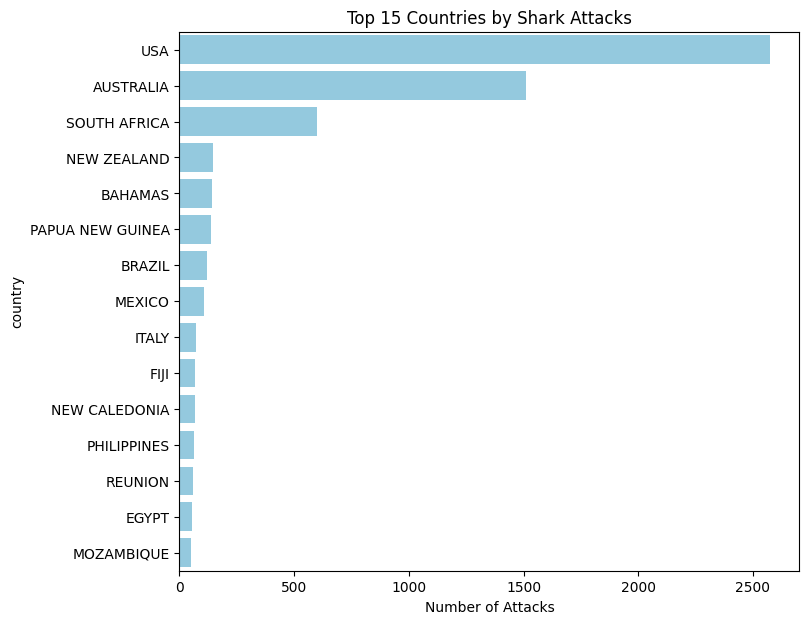

In [23]:
plt.figure(figsize=(8,7))
sns.countplot(y='country', data=df, order=df['country'].value_counts().iloc[:15].index, color='skyblue')
plt.title("Top 15 Countries by Shark Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("country")
plt.show()

Fatality rate

In [9]:
fatal = df[df['fatality'] == 'FATAL']

In [13]:
fatality = fatal['country'].value_counts()
fatality.head(5)

,count
country,
AUSTRALIA,308
USA,200
SOUTH AFRICA,110
PAPUA NEW GUINEA,58
MEXICO,50


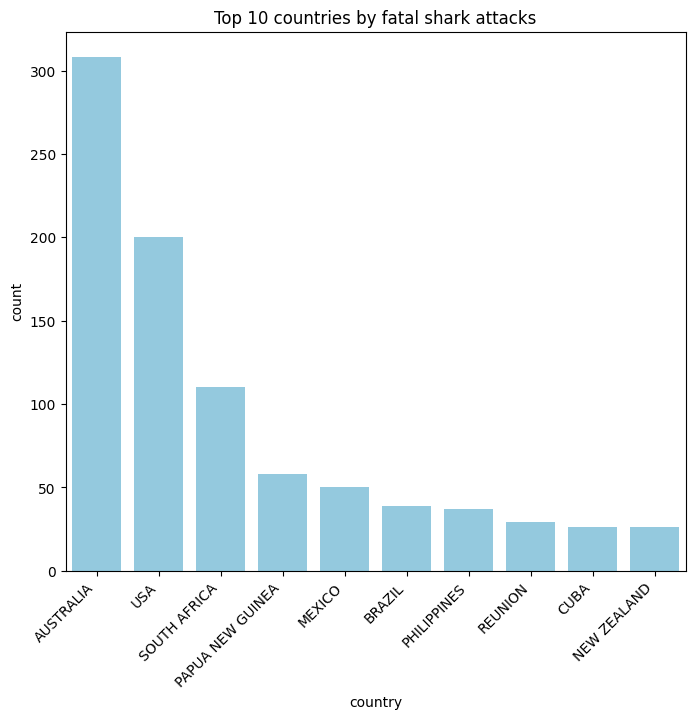

In [20]:
top_10_fatal_countries = fatality.head(10)

plt.figure(figsize=(8,7))
sns.barplot(top_10_fatal_countries,color=("skyblue"))
plt.title("Top 10 countries by fatal shark attacks")
plt.xticks(rotation=45, ha="right")
plt.show()



In [24]:
top_3_countries = df['country'].value_counts().head(3).index
top_3_countries

Index(['USA', 'AUSTRALIA', 'SOUTH AFRICA'], dtype='object', name='country')

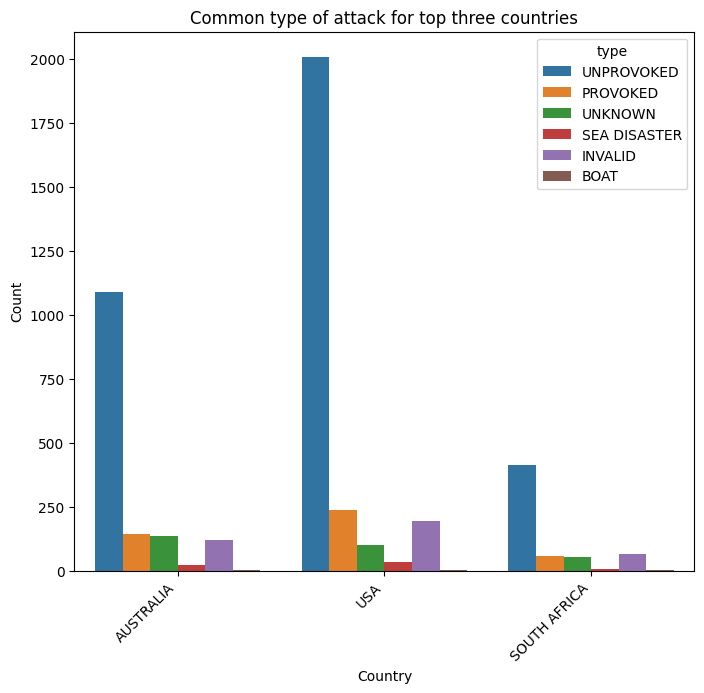

In [26]:
top3 = df[df['country'].isin(top_3_countries)]

plt.figure(figsize=(8,7))
sns.countplot(x='country', data=top3, hue='type')
plt.title("Common type of attack for top three countries")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

Males vs Female for top3

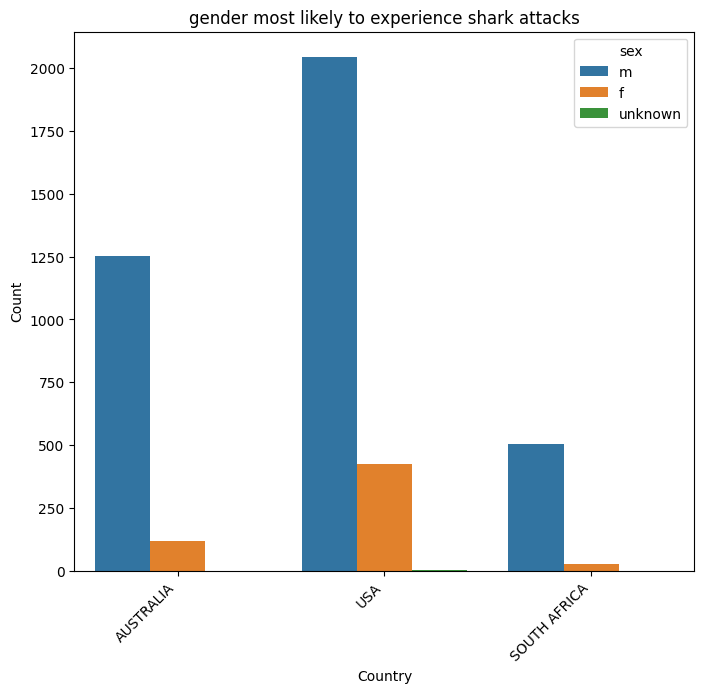

In [27]:
top3 = df[df['country'].isin(top_3_countries)]

plt.figure(figsize=(8,7))
sns.countplot(x='country', data=top3, hue='sex')
plt.title("gender most likely to experience shark attacks")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [34]:
gender = df[df['sex'].isin(['m', 'f']) & df['fatality'].isin(['FATAL', 'NON-FATAL'])]

fatal_by_sex = (gender
    .groupby('sex')['fatality']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index())

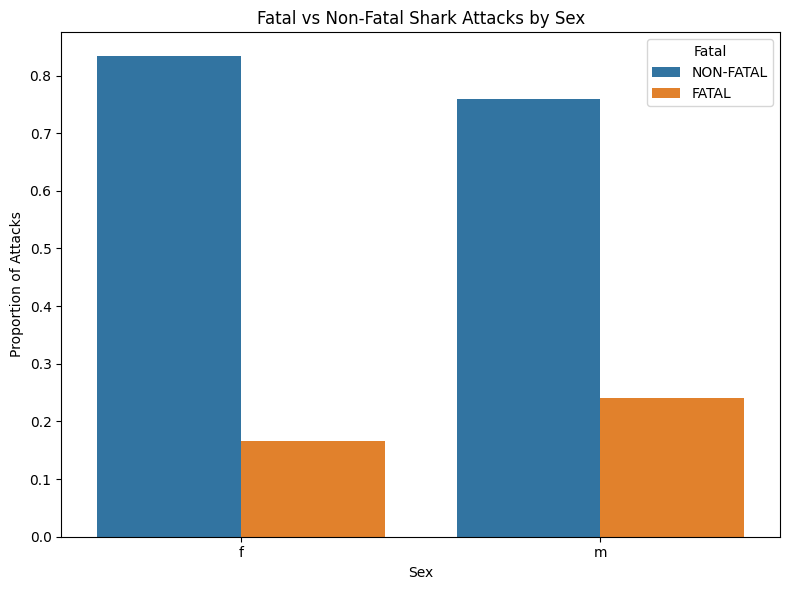

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=fatal_by_sex,
    x='sex',
    y='proportion',
    hue='fatality'
)

plt.title('Fatal vs Non-Fatal Shark Attacks by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of Attacks')
plt.legend(title='Fatal')
plt.tight_layout()
plt.show()

Top species by top 3 country

In [41]:
top_species = (
    df[df['country'].isin(top_3_countries)]
    .groupby(['country', 'species'])
    .size()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
)



In [43]:
top_species.groupby('country').head(3)

,country,species,count
11,AUSTRALIA,UNKNOWN SHARK,222
4,AUSTRALIA,GREAT WHITE SHARK,174
10,AUSTRALIA,TIGER SHARK,56
16,SOUTH AFRICA,GREAT WHITE SHARK,166
20,SOUTH AFRICA,UNKNOWN SHARK,45
17,SOUTH AFRICA,GREY NURSE SHARK,43
32,USA,UNKNOWN SHARK,345
25,USA,GREAT WHITE SHARK,209
31,USA,TIGER SHARK,121


In [52]:
top_countries = df['country'].value_counts().head(3).index

pie_data = (
    df[df['country'].isin(top_countries)]
    .groupby(['country', 'species'])
    .size()
    .reset_index(name='count')
)

pie_data = pie_data.sort_values(['country', 'count'], ascending=[True, False]) \
                   .groupby('country') \
                   .head(5)

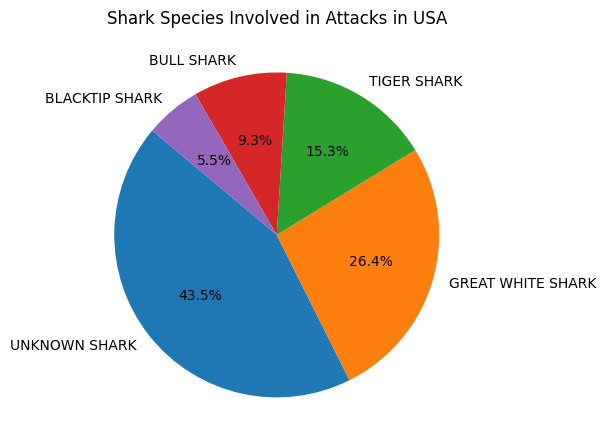

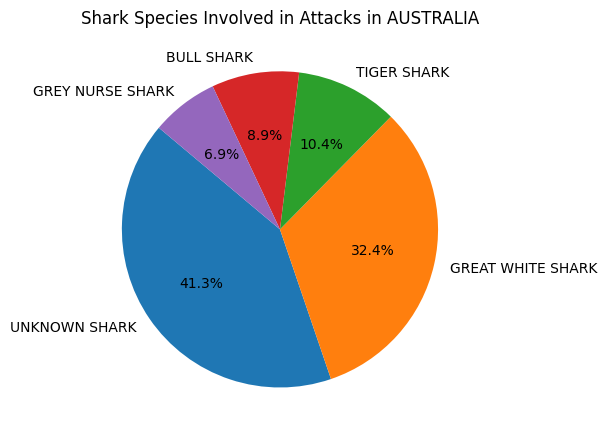

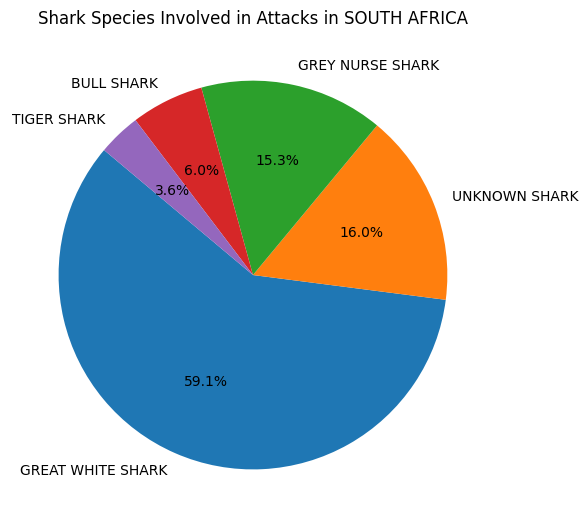

In [53]:
for country in top_countries:
    subset = pie_data[pie_data['country'] == country]

    plt.figure(figsize=(6,6))
    plt.pie(
        subset['count'],
        labels=subset['species'],
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Shark Species Involved in Attacks in {country}')
    plt.tight_layout()
    plt.show()